# import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
!pip install holidays
import holidays
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Gathering data

In [3]:
Daily_Weather_df = pd.read_csv('CBS_2021-2023_Daily_Weather.csv') # Gathering data
Daily_Weather_df.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


# Data Wrangling
Check the shape of datasets and column names (make changes where required). 
Handle missing values. 
Is any data types conversion required? 

shape of datasets

In [4]:
print(Daily_Weather_df.shape)

(1095, 8)


In [5]:
Daily_Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [6]:
Daily_Weather_df.isnull().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

Drop rows with missing values

In [7]:
Daily_Weather_df.dropna(inplace=True)
Daily_Weather_df

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8


Duplicates

In [8]:
duplicate_rows = Daily_Weather_df.duplicated().shape
print(duplicate_rows)

(1095,)


In [9]:
Daily_Weather_df.describe()

,Casual,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,3836.715068,5929.492237,9766.207306,12.836438,14.412785,24.391781,16.051050
std,2114.895305,2419.273171,4129.630135,11.889420,9.667675,27.774440,5.880358
min,174.000000,323.000000,497.000000,-15.200000,-9.100000,0.000000,5.600000
25%,2122.000000,4292.500000,6741.500000,2.700000,6.250000,1.000000,11.700000
50%,3595.000000,5848.000000,9759.000000,13.100000,14.900000,3.000000,14.700000
75%,5321.000000,7577.000000,13020.000000,23.400000,22.750000,53.000000,19.400000
max,12839.000000,12580.000000,20174.000000,34.700000,34.700000,75.000000,40.100000


Type conversion: Date

In [10]:
Daily_Weather_df["Date"] = pd.to_datetime(Daily_Weather_df["Date"])
Daily_Weather_df.dtypes

Casual                                     int64
Date                              datetime64[ns]
Member                                     int64
Total_rides                                int64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                 float64
weathercode (wmo code)                     int64
windspeed_10m_max (km/h)                 float64
dtype: object

# Create new features

Create a new feature: "Season":
Winter 12-02
Spring 03-05
Fall 09-11
Summer 06-08

In [11]:
# Ensure the 'Date' column is datetime
Daily_Weather_df['Date'] = pd.to_datetime(Daily_Weather_df['Date'], format="%Y-%m-%d")

# Function to map months to seasons
def get_season(row):
    if row['Date'].year in [2021, 2022, 2023]:  # correct year range
        month = row['Date'].month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'
    else:
        return 'Unknown'  # optional: handle years outside 2021–2023

# Apply the function to create a new column
Daily_Weather_df['Season'] = Daily_Weather_df.apply(get_season, axis=1)

# Convert to categorical with ordered categories
Daily_Weather_df['Season'] = pd.Categorical(
    Daily_Weather_df['Season'],
    categories=['Winter', 'Spring', 'Summer', 'Fall'],
    ordered=True
)

Daily_Weather_df

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Winter
...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Winter
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Winter
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Winter
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Winter


In [12]:
unique_values_after = Daily_Weather_df.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 Casual                            1010
Date                              1095
Member                            1034
Total_rides                       1042
apparent_temperature_mean (°C)     398
temperature_2m_mean (°C)           350
weathercode (wmo code)              13
windspeed_10m_max (km/h)           239
Season                               4
dtype: int64 



Create a new feature: "Days_Off"

In [13]:
# Ensure 'Date' column is datetime
Daily_Weather_df['Date'] = pd.to_datetime(Daily_Weather_df['Date'])

# Define your country's holidays – here for the US (customize if needed)
us_holidays = holidays.US(years=[2021, 2022, 2023])

Daily_Weather_df['Days_Off'] = (
    Daily_Weather_df['Date'].dt.date.isin(us_holidays) |
    (Daily_Weather_df['Date'].dt.weekday >= 5)
)
Daily_Weather_df['Days_Off'] = Daily_Weather_df['Days_Off'].map({True: "Yes", False: "No"})

Daily_Weather_df

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Season,Days_Off
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Winter,Yes
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Winter,Yes
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Winter,Yes
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Winter,No
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Winter,No
...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Winter,No
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Winter,No
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Winter,No
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Winter,Yes


In [14]:
unique_values_after = Daily_Weather_df.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 Casual                            1010
Date                              1095
Member                            1034
Total_rides                       1042
apparent_temperature_mean (°C)     398
temperature_2m_mean (°C)           350
weathercode (wmo code)              13
windspeed_10m_max (km/h)           239
Season                               4
Days_Off                             2
dtype: int64 



# Exploratory Data Analysis

Plot: Bike Ride vs. Weather

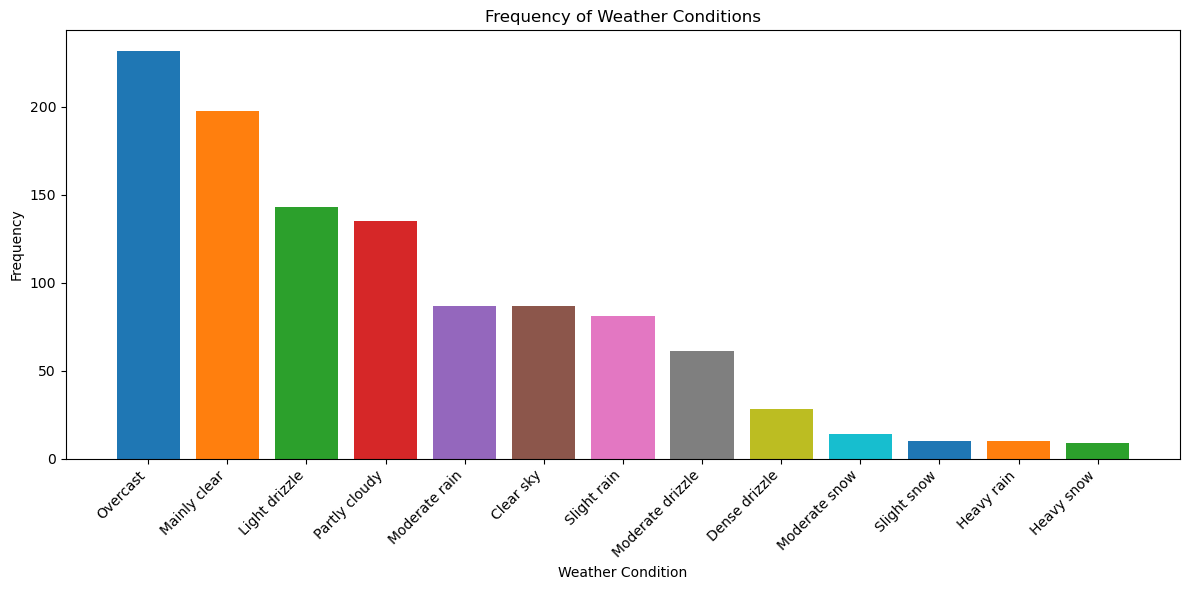

In [15]:
# WMO code to description mapping
wmo_code_map = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Rime fog",
    51: "Light drizzle",
    53: "Moderate drizzle",
    55: "Dense drizzle",
    61: "Slight rain",
    63: "Moderate rain",
    65: "Heavy rain",
    71: "Slight snow",
    73: "Moderate snow",
    75: "Heavy snow",
    95: "Thunderstorm",
    96: "Storm with slight hail",
    99: "Storm with heavy hail"
}

# Count occurrences
data = Daily_Weather_df['weathercode (wmo code)'].value_counts()

# Map index to descriptions
labels = [wmo_code_map.get(code, f"Unknown ({code})") for code in data.index]

colors = plt.cm.tab10.colors
color_cycle = [colors[i % len(colors)] for i in range(len(data))]

# Plot as bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, data.values, color=color_cycle)
plt.xlabel("Weather Condition")
plt.ylabel("Frequency")
plt.title("Frequency of Weather Conditions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Create a Plot with a date Selection

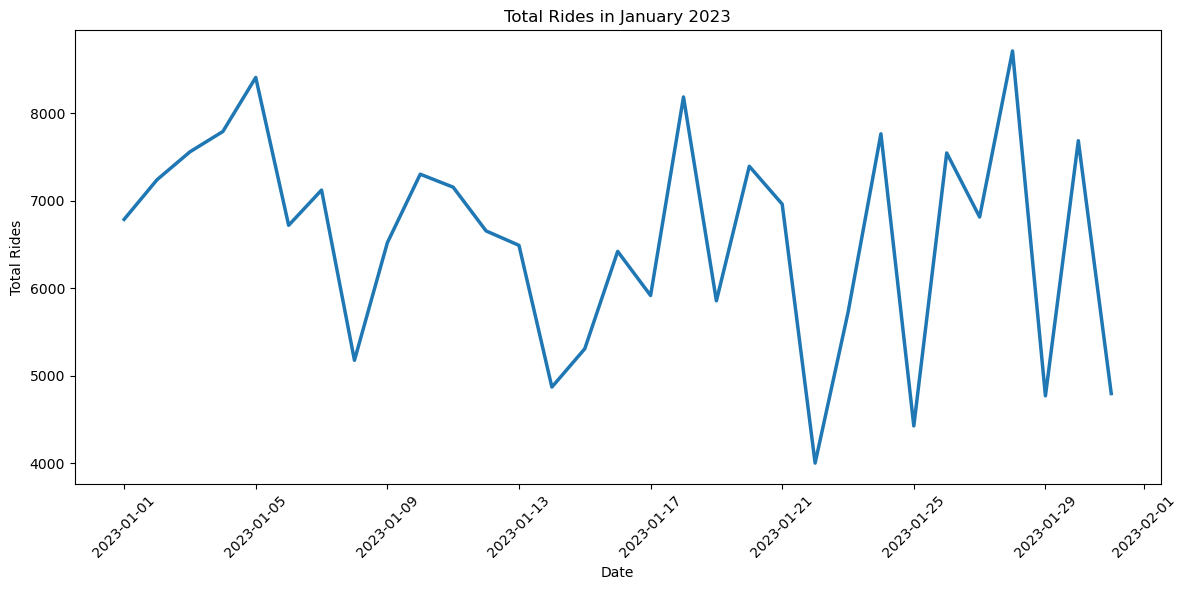

In [16]:
# 1. Convert 'date' column to datetime if needed
Daily_Weather_df['Date'] = pd.to_datetime(Daily_Weather_df['Date'])

# 2. Filter by year and month (e.g. January 2023)
df = Daily_Weather_df[(Daily_Weather_df['Date'].dt.year == 2023) & 
                      (Daily_Weather_df['Date'].dt.month == 1)]

# 3. Plot a weather variable over time, e.g. temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Total_rides', color='tab:blue', linewidth=2.5, errorbar=None)
plt.title("Total Rides in January 2023")
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Correlation Heatmap

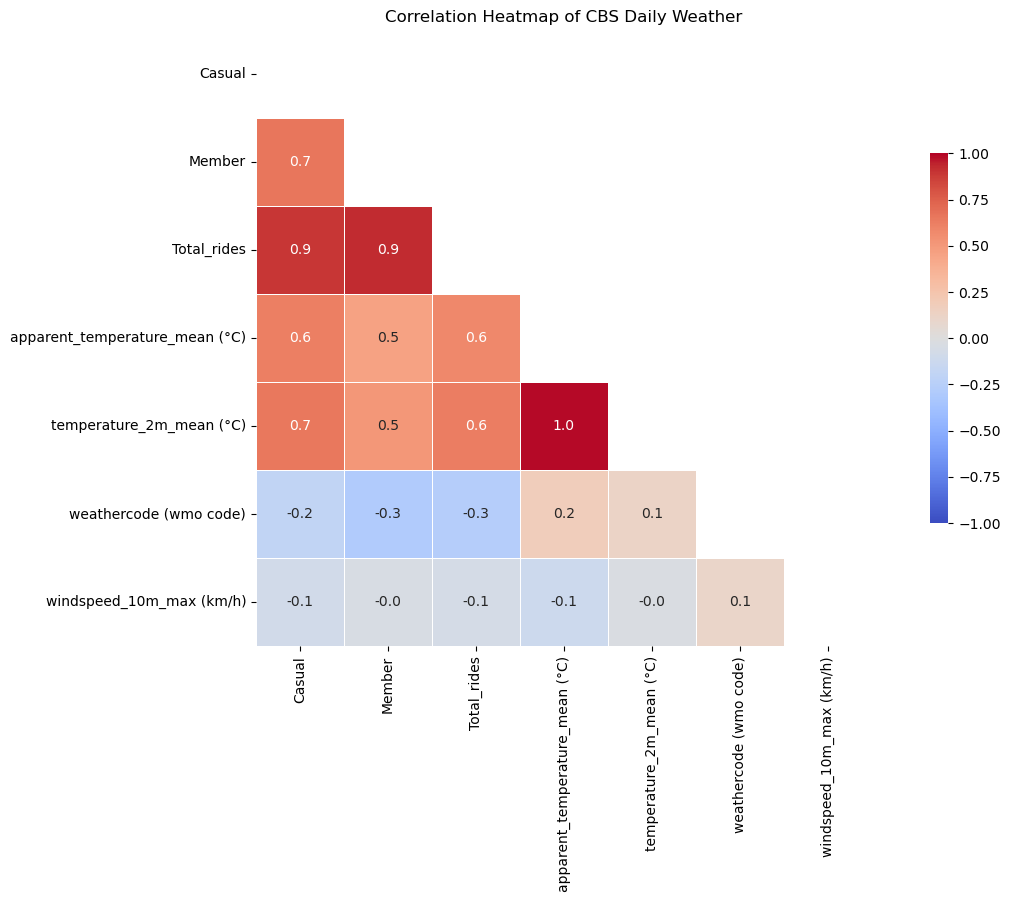

In [17]:
fig = plt.gcf()  
fig.set_size_inches(15, 8)
corr = Daily_Weather_df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool)) #Generate a mask for the upper triangle

df = Daily_Weather_df.corr(numeric_only=True)

ax = plt.axes()
sns.heatmap(data=df, annot=True, ax = ax, cmap="coolwarm", fmt=".1f", linewidths=0.5, square = True,  vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": 0.6})
ax.set_title('Correlation Heatmap of CBS Daily Weather')

plt.show()

In [18]:
Daily_Weather_df.dtypes

Casual                                     int64
Date                              datetime64[ns]
Member                                     int64
Total_rides                                int64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                 float64
weathercode (wmo code)                     int64
windspeed_10m_max (km/h)                 float64
Season                                  category
Days_Off                                  object
dtype: object

In [19]:
Daily_Weather_df.head(3)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Season,Days_Off
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Winter,Yes
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Winter,Yes
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Winter,Yes


# ML Regression

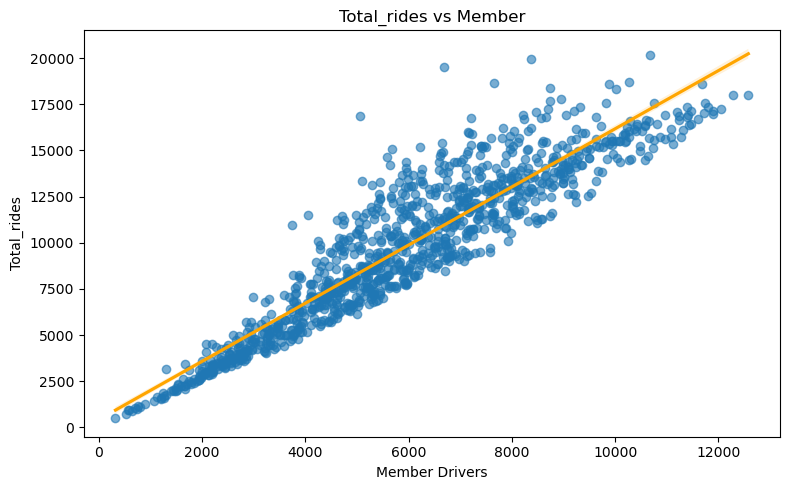

In [20]:
#LinearRegression: Total_rides as dependent variable / Member as independent variable
plt.figure(figsize=(8, 5))
sns.regplot(
    data=Daily_Weather_df,
    x='Member',
    y='Total_rides',
    line_kws={'color': 'orange'},  # Customize line color
    scatter_kws={'alpha': 0.6}     # Optional: make points slightly transparent
)

plt.title("Total_rides vs Member")
plt.xlabel("Member Drivers")
plt.ylabel("Total_rides")
plt.tight_layout()
plt.show()


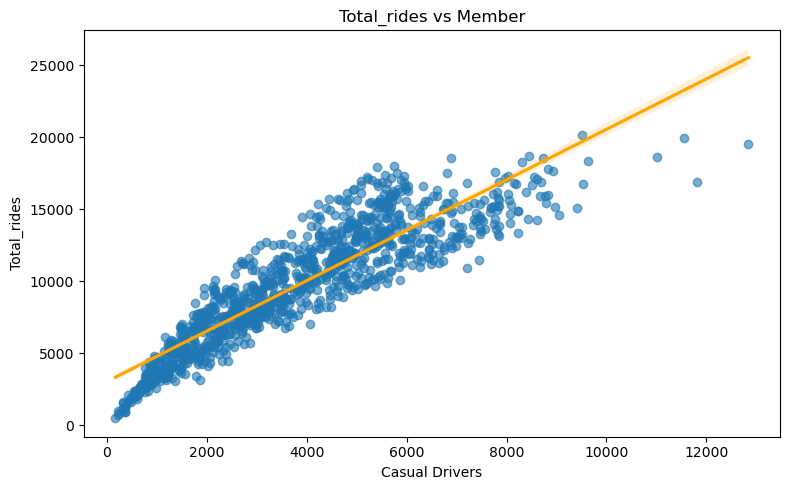

In [21]:
#LinearRegression: Total_rides as dependent variable / Casual as independent variable
plt.figure(figsize=(8, 5))
sns.regplot(
    data=Daily_Weather_df,
    x='Casual',
    y='Total_rides',
    line_kws={'color': 'orange'},  # Customize line color
    scatter_kws={'alpha': 0.6}     # Optional: make points slightly transparent
)

plt.title("Total_rides vs Member")
plt.xlabel("Casual Drivers")
plt.ylabel("Total_rides")
plt.tight_layout()
plt.show()

# ML Regression for Member

In [22]:
X = Daily_Weather_df.drop("Total_rides", axis="columns")
y = Daily_Weather_df[["Total_rides"]]  # make one column DataFrame

print(X.shape)
print(y.shape)

(1095, 9)
(1095, 1)


In [23]:
X = Daily_Weather_df[["Member"]]
y = Daily_Weather_df[["Total_rides"]]  # make one column DataFrame

print(X.shape)
print(y.shape)

(1095, 1)
(1095, 1)


In [24]:
X.head()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [25]:

# Train the model
reg_multi_01 = linear_model.LinearRegression()
reg_multi_01.fit(X_train, y_train)



LinearRegression()

In [26]:
# Predict values using test data.
reg_multi_score = (reg_multi_01.score(X_test, y_test) * 100)

print(f"R² score (explained variance): {round(reg_multi_score, 2)}%")


R² score (explained variance): 83.76%


In [27]:
# Define the attributes of the house you want to predict the price for
# Format: [PropertySize, LivingArea, YearBuilt, Bedrooms]
attributes = [1600]

input_df = pd.DataFrame([attributes], columns=["Member"])
prediction = reg_multi_01.predict(input_df)

print(f"""A city with the following attributes:
  Member: {attributes[0]}
Will have rides around: {round(prediction[0][0], 2)}
This model explains approximately {round(reg_multi_score, 2)}% of the variance in rides numbers (R²)
""")

A city with the following attributes:
  Member: 1600
Will have rides around: 2916.61
This model explains approximately 83.76% of the variance in rides numbers (R²)



# ML Regression for Casual

In [28]:
X = Daily_Weather_df.drop("Total_rides", axis="columns")
y = Daily_Weather_df[["Total_rides"]]  # make one column DataFrame

print(X.shape)
print(y.shape)

(1095, 9)
(1095, 1)


In [29]:
X = Daily_Weather_df[["Casual"]]
y = Daily_Weather_df[["Total_rides"]]  # make one column DataFrame

print(X.shape)
print(y.shape)

(1095, 1)
(1095, 1)


In [30]:
X.head()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [31]:
# Train the model
reg_multi_01 = linear_model.LinearRegression()
reg_multi_01.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict values using test data.
reg_multi_score = (reg_multi_01.score(X_test, y_test) * 100)
print(f"R² score (explained variance): {round(reg_multi_score, 2)}%")

R² score (explained variance): 78.99%


In [33]:
# Define the attributes of the house you want to predict the price for
# Format: [PropertySize, LivingArea, YearBuilt, Bedrooms]
attributes = [1600]

input_df = pd.DataFrame([attributes], columns=["Casual"])
prediction = reg_multi_01.predict(input_df)

print(f"""A city with the following attributes:
  Casual: {attributes[0]}
Will have rides around: {round(prediction[0][0], 2)}
This model explains approximately {round(reg_multi_score, 2)}% of the variance in rides numbers (R²)
""")

A city with the following attributes:
  Casual: 1600
Will have rides around: 5825.64
This model explains approximately 78.99% of the variance in rides numbers (R²)

